In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("netflix1_866743.csv")

In [4]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
for i in df.columns:
    print(i)
    print(df[i].sort_values().unique())

show_id
['s1' 's10' 's100' ... 's997' 's998' 's999']
type
['Movie' 'TV Show']
title
['#Alive' '#AnneFrank - Parallel Stories' '#FriendButMarried' ... '마녀사냥'
 '반드시 잡는다' '최강전사 미니특공대 : 영웅의 탄생']
director
['A. L. Vijay' 'A. Raajdheep' 'A. Salaam' ... 'Óskar Thór Axelsson'
 'Ömer Faruk Sorak' 'Şenol Sönmez']
country
['Argentina' 'Australia' 'Austria' 'Bangladesh' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'China'
 'Colombia' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Egypt'
 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Lebanon'
 'Luxembourg' 'Malaysia' 'Mauritius' 'Mexico' 'Mozambique' 'Namibia'
 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Not Given' 'Pakistan'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Puerto Rico'
 'Romania' 'Russia' 'Saudi Arabia' 'Senegal' 'Serbia' 'Singapore'
 '

In [10]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [21]:
df["show_id"]=df["show_id"].str.replace("s","")

In [17]:
df["title"]=df["title"].replace("#","")

In [18]:
df["genre"]=df["listed_in"].apply(lambda x:pd.Series(str(x).split(","))[0])

In [22]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genre
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies
4,8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
8785,8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows
8786,8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV
8787,8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
8788,8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV,Kids' TV


In [23]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
genre           0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [7]:
df.groupby(df.release_year)["show_id"].count().sort_values(ascending=False)

release_year
2018    1146
2019    1030
2017    1030
2020     953
2016     901
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: show_id, Length: 74, dtype: int64

<AxesSubplot:xlabel='release_year'>

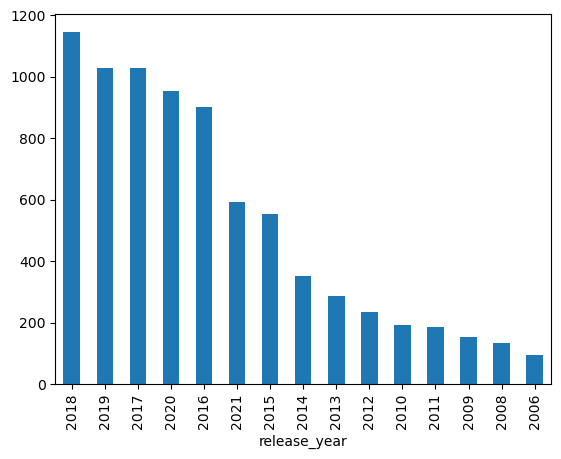

In [11]:
df.groupby(df.release_year)["show_id"].count().sort_values(ascending=False).head(15).plot.bar()

In [13]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

<AxesSubplot:>

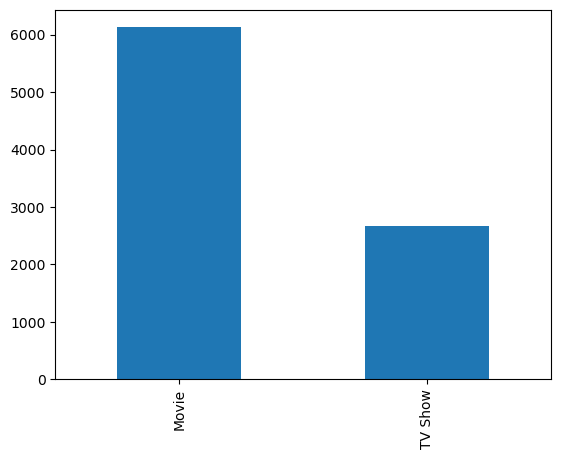

In [14]:
df['type'].value_counts().plot.bar()
# Movies are double to that of the TV shows

In [19]:
len(df[(df["type"]=="Movie") & (df["release_year"]==2020)])

517

In [21]:
df["director"].value_counts().head(10)

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

In [23]:
print("Different Ratings in Movie------",df["rating"].unique())

Different Ratings in Movie------ ['PG-13' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y7' 'TV-Y' 'PG' 'TV-G' 'R' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [24]:
df.duration.value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [25]:
df_tv = df[df["type"]=="TV Show"]
df_tv["country"].value_counts().sort_values(ascending=False).head(1)
# United States has most number of TV Shows

United States    845
Name: country, dtype: int64

In [30]:
df[(df["type"]=="Movie") & (df["listed_in"].str.contains("Drama", case=False))].head(15)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
54,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...",Not Given,9/17/2021,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies"
55,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,Not Given,9/17/2021,2021,TV-MA,110 min,"Dramas, International Movies, Thrillers"
56,s37,Movie,The Stronghold,Cédric Jimenez,Not Given,9/17/2021,2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies"
57,s39,Movie,Birth of the Dragon,George Nolfi,China,9/16/2021,2017,PG-13,96 min,"Action & Adventure, Dramas"
60,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
61,s43,Movie,Jaws 2,Jeannot Szwarc,United States,9/16/2021,1978,PG,116 min,"Dramas, Horror Movies, Thrillers"


In [31]:
 df[(df["type"]=="TV Show") & (df["listed_in"].str.contains("Kids' TV",case=False))].head(15)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
20,s4832,TV Show,True: Magical Friends,"Mark Thornton, Todd Kauffman",United States,6/15/2018,2018,TV-Y,1 Season,Kids' TV
21,s4833,TV Show,True: Wonderful Wishes,"Mark Thornton, Todd Kauffman",United States,6/15/2018,2018,TV-Y,1 Season,Kids' TV
22,s4857,TV Show,Dance & Sing with True,"Mark Thornton, Todd Kauffman",United States,5/18/2018,2018,TV-Y,1 Season,Kids' TV
36,s35,TV Show,Tayo and Little Wizards,Not Given,Pakistan,9/17/2021,2020,TV-Y7,1 Season,Kids' TV
39,s86,TV Show,Pokémon Master Journeys: The Series,Not Given,Pakistan,9/10/2021,2021,TV-Y7,1 Season,"Anime Series, Kids' TV"
40,s88,TV Show,Titipo Titipo,Not Given,Pakistan,9/10/2021,2019,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows"
41,s90,TV Show,Mighty Raju,Not Given,Pakistan,9/9/2021,2017,TV-Y7,4 Seasons,Kids' TV
42,s101,TV Show,Tobot Galaxy Detectives,Not Given,Pakistan,9/7/2021,2019,TV-Y7,2 Seasons,Kids' TV
47,s190,TV Show,Bread Barbershop,Not Given,Pakistan,8/28/2021,2020,TV-Y,2 Seasons,"Kids' TV, TV Comedies"
72,s198,TV Show,I Heart Arlo,Not Given,Pakistan,8/27/2021,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies"
